In [65]:
with open("bin/debug/net6.0/log.txt","r") as file:
    data = file.read()
lines = data.split("\n")
tupledLines = []
for i in lines:
    list = i.split(', ')
    try:
        tupled = (list[0],list[1],list[2])
    except IndexError:
        print(i)
    tupledLines.append(tupled)
print("Data loaded")


Data loaded


In [66]:
heartbeat_hash = {}
web_hash = {}
router_hash = {}
ping_hash = {}
for t in tupledLines:
    task = t[0]
    start_time = t[1]
    duration = t[2]
    if task == "Heart Beat":
        heartbeat_hash[start_time] = duration
    elif task == "Web":
        web_hash[start_time] = duration
    elif task == "Router":
        router_hash[start_time] = duration
    elif task == "Ping":
        ping_hash[start_time] = duration
    else:
        print(f"Unknown task: {task}")
print("")

In [67]:
combined_hash = {}
for st in heartbeat_hash.keys():
    heartbeat = heartbeat_hash[st]
    try:
        ping = ping_hash[st]
    except KeyError:
        ping = None
    try:
        router = router_hash[st]
    except KeyError:
        router = None
    try:
        web = web_hash[st]
    except KeyError:
        web = None
    t = (heartbeat, ping, web)
    #t = (heartbeat,router,ping,web)
    if t == ("0",None,None,None) or t == ("0",None,None):
        print(f"Dropping row {st}")
    else:
        combined_hash[st] = t
    


Dropping row 1637735690054
Dropping row 1637735946636


In [70]:
len(combined_hash.keys())

4491

In [71]:
from datetime import timezone
from datetime import datetime

heartbeat_dur = []
ping_dur = []
web_dur = []

for k in combined_hash.keys():
    (heartbeat,ping,web) = combined_hash[k]
    st = int(k)/1000
    heartbeat = int(heartbeat)
    start_time = datetime.fromtimestamp(st)
    # print(start_time)
    if not ping or ping == "-1":
        ping = 30000
    else:
        ping = int(ping)
    if not web or web == "-1":
        web = 30000
    else:
        web = int(web)
    heartbeat_dur.append(heartbeat)
    ping_dur.append(ping)
    web_dur.append(web)


In [72]:
import seaborn

C:\Users\corri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

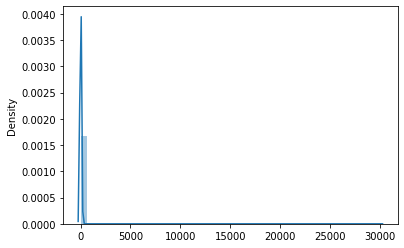

In [73]:
seaborn.distplot(web_dur)

C:\Users\corri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

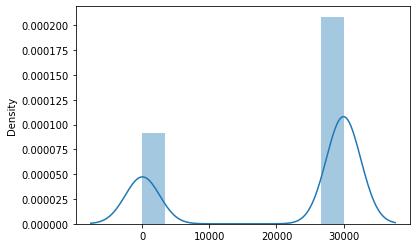

In [74]:
seaborn.distplot(ping_dur)

C:\Users\corri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\corri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

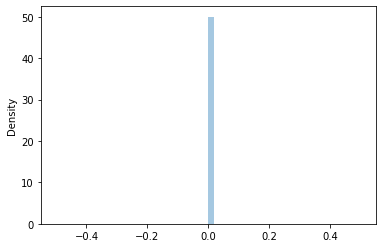

In [75]:
seaborn.distplot(heartbeat_dur)